# Learning from Data Week 4

Questions provided here:
https://work.caltech.edu/homework/hw4.pdf

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
from __future__ import division

### Question 2
There are a number of bounds on the generalization error ε, all holding with probability at least 1−δ. Fix dvc = 50 and δ = 0.05 and plot these bounds as a function of N. Which bound is the smallest for very large N, say N = 10,000? Note that [c] and [d] are implicit bounds in ε.

In [2]:
# Investigate different bounds on generalization error
dvc = 50
delta = 0.05

# Original VC bound
Original_VC = lambda N: np.sqrt(8/N*(np.log(4) + dvc*np.log(2*N) - np.log(delta)))

# Rademacher Penalty bound
Rademacher = lambda N: np.sqrt(2/N*(np.log(2*N)+dvc*np.log(N))) + np.sqrt(2/N*np.log(1/delta)) + 1/N

# Parrondo and Van den Broek
def PVdB(N):
    a = 1
    b = -2/N
    c = -1/N * (np.log(6/delta) + dvc*np.log(2*N))
    return (-b + np.sqrt(np.square(b)-4*a*c))/(2*a)

# Devroye
def Devroye(N):
    a = 1-2/N
    b = -2/N
    c = -1/(2*N) * (np.log(4/delta) + 2*dvc*np.log(N))
    return (-b + np.sqrt(np.square(b)-4*a*c))/(2*a)

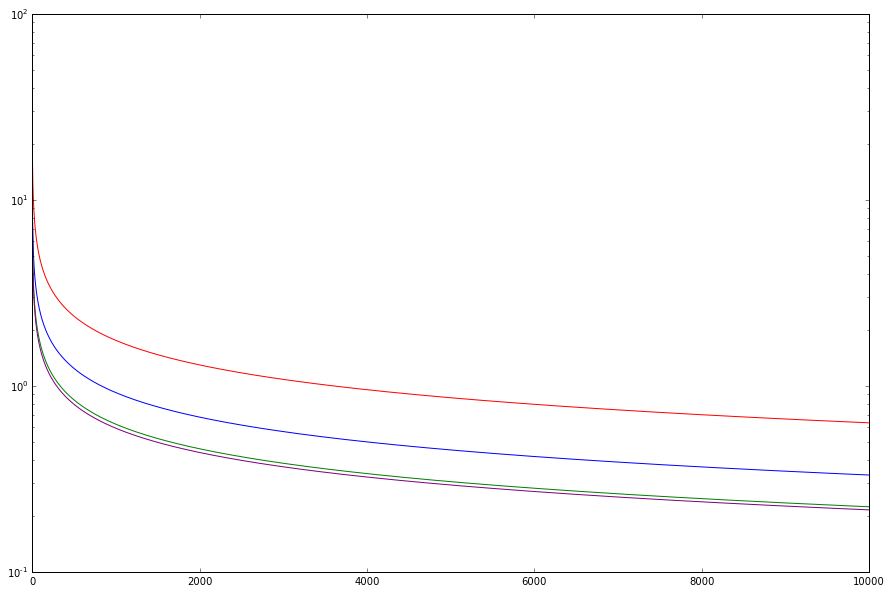

In [3]:
# Plots
N = np.arange(1,10001)
plt.figure(figsize=(15,10))
plt.plot(N, Original_VC(N), 'r-')
plt.plot(N, Rademacher(N), 'b-')
plt.plot(N, PVdB(N), 'g-')
plt.plot(N, Devroye(N), 'purple')
plt.yscale('log')

Devroye provides the smallest bound on large N

## Question 3
For the same values of dvc and δ of Problem 2, but for small N, say N = 5,
which bound is the smallest?

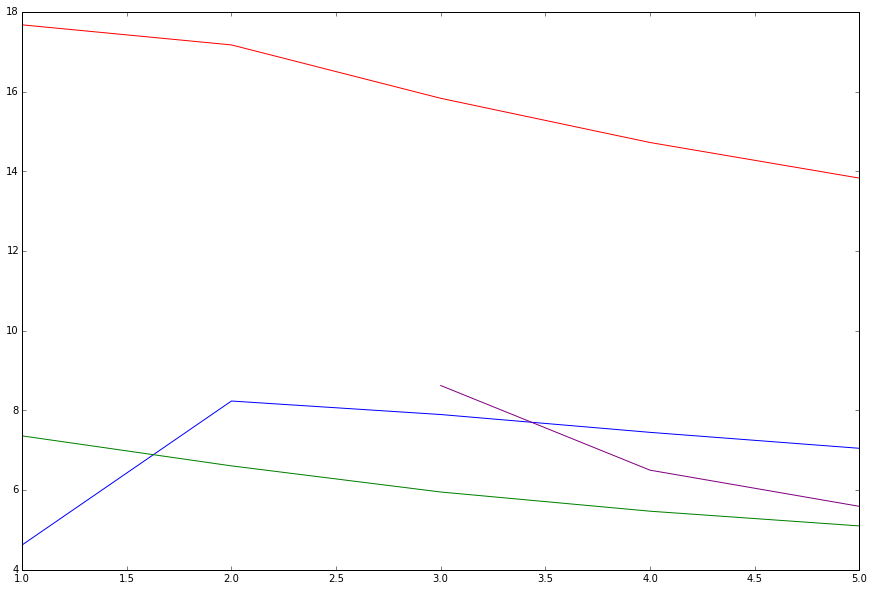

In [77]:
# Plots
N = np.arange(1,6)
plt.figure(figsize=(15,10))
plt.plot(N, Original_VC(N), 'r-')
plt.plot(N, Rademacher(N), 'b-')
plt.plot(N, PVdB(N), 'g-')
plt.plot(N, Devroye(N), 'purple')

Parrondo and Van den Broek provides the smallest bound for small N.

## Question 4

What is the average hypothesis?

In [42]:
np.random.seed(0)
# Define target function
target_func = lambda x: np.sin(np.pi * x)

# Run experiment
def bias_variance_exp():    
    # Initialize array of coefficients
    coefs = []
    # Iterate 10,000 times
    for i in range(10000):
        # Pick 2 random points from uniform distribution from [-1,1]
        x_points = np.random.uniform(-1,1,2)
        y_points = target_func(x_points)
        # Define beta estimate with 2 input points, given in form of [x1, x2], [y1, y2]
        # Model of the form y = ax
        beta = np.sum(x_points * y_points) / np.sum(x_points**2)
        coefs.append(beta)
    return np.mean(coefs)
print ("The coefficient from the average hypothesis is {}".format(bias_variance_exp()))

The coefficient from the average hypothesis is 1.40456931112


## Questions 5

What is the bias?

In [47]:
avg_coef = bias_variance_exp()

def bias():
    # Create 10,000 points
    x = np.arange(-1, 1, 2/10000)
    # Calculate target values and average hypothesis values
    y = target_func(x)
    g_avg = avg_coef * x
    return np.mean((g_avg - y)**2)

print ("The bias is {}".format(bias()))

The bias is 0.270251936638


## Question 6

What is the variance?

In [48]:
avg_coef = bias_variance_exp()

def variance():
    # Create 10,000 points
    x = np.arange(-1, 1, 2/10000)
    g_avg = avg_coef * x
    # Initialize array to hold variance of each dataset
    var_data = []
    # Iterate over 10,000 datasets
    for i in range(10000):
        # Pick 2 random points from uniform distribution from [-1,1] estimate beta
        x_points = np.random.uniform(-1,1,2)
        y_points = target_func(x_points)
        beta = np.sum(x_points * y_points) / np.sum(x_points**2)
        # Calculate g of x
        g = beta * x
        # Take variance of g and add to var_data
        var_data.append(np.mean((g - g_avg)**2))
    # Take expected value over all datasets
    return np.mean(var_data)

print ("The variance is {}".format(variance()))

The variance is 0.236485750147
